In [5]:
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max
from tnia.io.tifffile_helper import open_ij3D
from clij2fft.richardson_lucy import richardson_lucy, richardson_lucy_nc
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from tnia.nd.ndutil import centercrop

In [6]:
base_dir ='/home/bnorthan/Images/tnia-python-images/notebooks/'
base_dir =r'D:\images\tnia-python-images\notebooks//'

dir_name=base_dir+'deconvolution/abrf/phantom/'

input_name=dir_name+"forward.tif" 
im = imread(input_name)


In [7]:
im=im-im.min()+1

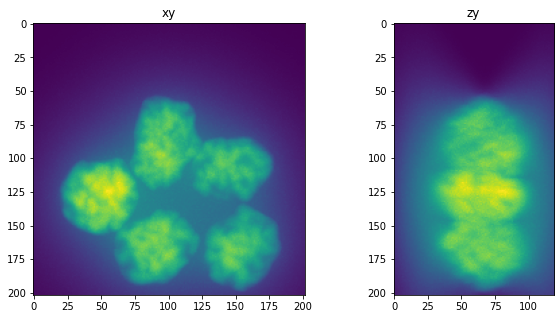

In [8]:
fig=show_xy_zy_max(im, figsize=(10,5))

In [9]:
psf_name = dir_name+"PSF_GL_0.75NA_0.124_0.2.tif"
#psf_name = dir_name+"small_psf.tif"

psf = imread(psf_name)
psf = psf.astype('float32')
psf = centercrop(psf, (101,64,64))
psf = psf/psf.sum()
psf.shape

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


(101, 64, 64)

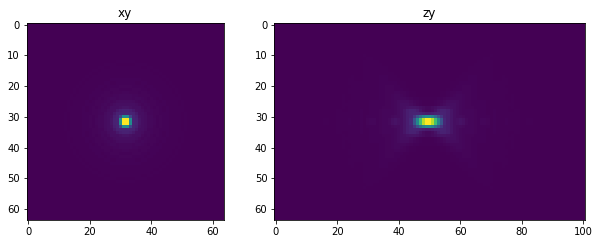

In [10]:
fig=show_xy_zy_max(psf, figsize=(10,5))

In [13]:
iter=300
decon1, _, _=richardson_lucy(im, psf, iter, 0)

AttributeError: 'tuple' object has no attribute 'shape'

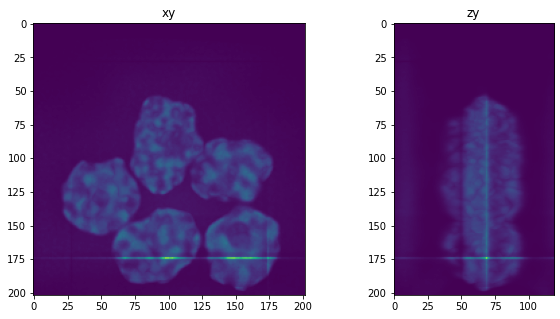

In [12]:
fig=show_xy_zy_max(decon1, figsize=(10,5))

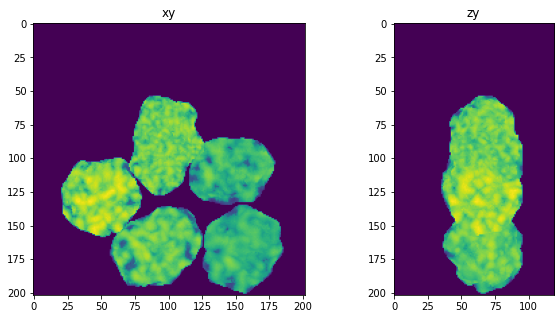

In [34]:
truth_name = dir_name+"phantom_.tif"
phantom=imread(truth_name)
fig=show_xy_zy_max(phantom, figsize=(10,5))